In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial import distance

In [2]:
lat= [41.176722143285566, 41.17659333150621, 41.17655439127667, 41.17650569946945, 41.176299453953774, 41.17627900362027, 41.17624547777815, 41.176202177596586, 41.17614859294905, 41.17611622154435, 41.176082421338144, 41.17602948030873, 41.17597889341166, 41.17592830004511, 41.1758534641387, 41.17577749515003, 41.17572499121969, 41.175623439447854, 41.17581198812489, 41.17614181064614, 41.176288783204775, 41.176509179569, 41.17648961713961, 41.176556721224806, 41.176615142982016, 41.17667031158486, 41.17668723826763, 41.176728317944246, 41.1767909731835, 41.17682498188173, 41.17683708794725, 41.1768734732024, 41.17688578048039, 41.17697823282421, 41.177009404476685, 41.17700412396125, 41.17693330628831, 41.17690677660588, 41.176722143285566]
lon= [-8.663374078682251, -8.663148237958767, -8.663171991113469, -8.663205300454747, -8.663356182018457, -8.663306206302225, -8.663224050952005, -8.663125802345737, -8.66303063711307, -8.662972559296767, -8.662919309545142, -8.662836998924126, -8.66276275867605, -8.662690102277455, -8.662596348729322, -8.662504215313497, -8.662449233638524, -8.662352053299946, -8.66198111973919, -8.662275983882864, -8.661981753995397, -8.662574367217026, -8.66260632969649, -8.662789866973261, -8.662751840418723, -8.662899994710619, -8.66289049522976, -8.66295181033338, -8.663032619055913, -8.663010409670246, -8.663039416510253, -8.663020438038627, -8.662975567609537, -8.662940982556266, -8.663015112408349, -8.663092112819042, -8.663194326973201, -8.663181264365768, -8.663374078682251]
len(lat), len(lon)

(39, 39)

In [20]:
lat_min_max = (min(lat), max(lat))
lon_min_max = (min(lon), max(lon))
lat_min_max, lon_min_max

((41.175623439447854, 41.177009404476685),
 (-8.663374078682251, -8.66198111973919))

In [67]:
point = (min(lon)-0.0001, min(lat)-0.0001)
point

(-8.66347407868225, 41.17552343944785)

In [14]:
df = pd.DataFrame()
df['lat'] = lat
df['lon'] = lon
df.head()

,lat,lon
0,41.176722,-8.663374
1,41.176593,-8.663148
2,41.176554,-8.663172
3,41.176506,-8.663205
4,41.176299,-8.663356


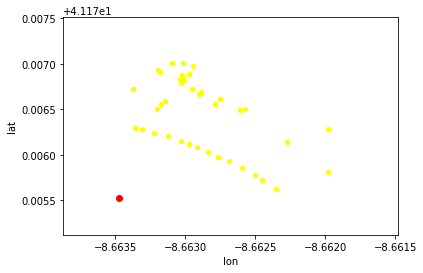

In [69]:
df.plot(kind='scatter',
        x='lon',
        y='lat',
        color='yellow')
plt.scatter(point[0], point[1], color='red')
plt.xlim(expand(lon_min_max, 0.0005)) #this is not properly scaled but wtv
plt.ylim(expand(lat_min_max, 0.0005))
plt.show()

In [80]:
def point_to_pol(lon, lat, point):
    minimum = float('inf')
    for vertex in zip(lon, lat):
        d = distance.euclidean(point, vertex)
        if d < minimum:
            minimum = d
    return minimum

In [81]:
point_to_pol(lon, lat, point)

v:  (-8.663374078682251, 41.176722143285566)
p:  (-8.66347407868225, 41.17552343944785)
v:  (-8.663148237958767, 41.17659333150621)
p:  (-8.66347407868225, 41.17552343944785)
v:  (-8.663171991113469, 41.17655439127667)
p:  (-8.66347407868225, 41.17552343944785)
v:  (-8.663205300454747, 41.17650569946945)
p:  (-8.66347407868225, 41.17552343944785)
v:  (-8.663356182018457, 41.176299453953774)
p:  (-8.66347407868225, 41.17552343944785)
v:  (-8.663306206302225, 41.17627900362027)
p:  (-8.66347407868225, 41.17552343944785)
v:  (-8.663224050952005, 41.17624547777815)
p:  (-8.66347407868225, 41.17552343944785)
v:  (-8.663125802345737, 41.176202177596586)
p:  (-8.66347407868225, 41.17552343944785)


0.000762877369650151